<a href="https://colab.research.google.com/github/LucBert/Demo/blob/main/Lecture_12_continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real data

##Recap real data (read html)

In [ ]:
import pandas as pd

In [ ]:
wiki_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories')
wiki_df = wiki_list[0]

In [ ]:
wiki_df.head()

,Actor/Actress,Best Actor/Actress Awards,Best Supporting Actor/Actress Awards,Total awards,Total nominations
0,Katharine Hepburn †,Morning Glory (1933) Guess Who's Coming to Din...,NaN,4,12
1,Meryl Streep,Sophie's Choice (1982) The Iron Lady (2011),Kramer vs. Kramer (1979),3,21
2,Jack Nicholson,One Flew Over the Cuckoo's Nest (1975) As Good...,Terms of Endearment (1983),3,12
3,Ingrid Bergman †,Gaslight (1944) Anastasia (1956),Murder on the Orient Express (1974),3,7
4,Daniel Day-Lewis,My Left Foot (1989) There Will Be Blood (2007)...,NaN,3,6


In [ ]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Actor/Actress                         44 non-null     object
 1   Best Actor/Actress Awards             34 non-null     object
 2   Best Supporting Actor/Actress Awards  23 non-null     object
 3   Total awards                          44 non-null     int64 
 4   Total nominations                     44 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


In [ ]:
wiki_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total awards,44.0,2.181818,0.445793,2.0,2.0,2.0,2.0,4.0
Total nominations,44.0,5.659091,3.497130,2.0,3.0,5.0,7.0,21.0


## map (columns)

In [ ]:
wiki_df.columns

Index(['Actor/Actress', 'Best Actor/Actress Awards',
       'Best Supporting Actor/Actress Awards', 'Total awards',
       'Total nominations'],
      dtype='object')

In [ ]:
worst_string = wiki_df.columns[1]

In [ ]:
worst_string.replace(' ', '_').replace('/','_').lower()

'best_actor_actress_awards'

In [ ]:
new_columns = []
for column_name in wiki_df.columns:
    new_column_name = column_name.replace(' ', '_').replace('/','_').lower()
    new_columns.append(new_column_name)

In [ ]:
new_columns

['actor_actress',
 'best_actor_actress_awards',
 'best_supporting_actor_actress_awards',
 'total_awards',
 'total_nominations']

In [ ]:
new_columns = [x.replace(' ', '_').replace('/','_').lower() for x in wiki_df.columns]

In [ ]:
new_columns

['actor_actress',
 'best_actor_actress_awards',
 'best_supporting_actor_actress_awards',
 'total_awards',
 'total_nominations']

In [ ]:
map(lambda x : x.replace(' ', '_').replace('/','_').lower(), wiki_df.columns)

In [ ]:
new_columns = list(map(lambda x : x.replace(' ', '_').replace('/','_').lower(), wiki_df.columns))

In [ ]:
new_columns

['actor_actress',
 'best_actor_actress_awards',
 'best_supporting_actor_actress_awards',
 'total_awards',
 'total_nominations']

In [ ]:
new_columns = wiki_df.columns.map(lambda x : x.replace(' ', '_').replace('/','_').lower())
new_columns

Index(['actor_actress', 'best_actor_actress_awards',
       'best_supporting_actor_actress_awards', 'total_awards',
       'total_nominations'],
      dtype='object')

In [ ]:
wiki_df.columns = new_columns

In [ ]:
string_with_leading_spaces = '    hello   '
string_with_leading_spaces

'    hello   '

In [ ]:
string_with_leading_spaces.strip()

'hello'

In [ ]:
wiki_df.actor_actress.replace?

In [ ]:
wiki_df.actor_actress.map(lambda x : x.replace('†', '').strip())
#non ASCII

0       Katharine Hepburn
1            Meryl Streep
2          Jack Nicholson
3          Ingrid Bergman
4        Daniel Day-Lewis
5       Frances McDormand
6          Walter Brennan
7             Bette Davis
8           Spencer Tracy
9       Denzel Washington
10          Marlon Brando
11            Jack Lemmon
12         Cate Blanchett
13         Robert De Niro
14             Jane Fonda
15         Dustin Hoffman
16          Michael Caine
17              Tom Hanks
18        Anthony Hopkins
19          Jessica Lange
20           Maggie Smith
21            Gary Cooper
22    Olivia de Havilland
23           Gene Hackman
24          Fredric March
25              Sean Penn
26       Elizabeth Taylor
27           Jodie Foster
28         Glenda Jackson
29          Anthony Quinn
30        Shelley Winters
31        Renée Zellweger
32         Melvyn Douglas
33            Sally Field
34          Jason Robards
35          Peter Ustinov
36           Dianne Wiest
37         Mahershala Ali
38          

## Histograms


In [ ]:
import numpy as np

In [ ]:
normal_samples = np.random.normal(size=10000)

In [ ]:
normal_samples[:100]

array([-0.53803911,  0.68322817, -0.42503191, -0.36956364, -0.52638205,
       -0.26299254,  0.5010704 ,  1.66137627, -0.17065188, -0.5309816 ,
        3.04344526,  0.38581036,  0.08548539,  0.04706335,  0.58757879,
       -0.39431652, -0.66749922,  0.11391359, -0.75493884, -0.49495592,
       -2.10590961,  0.58200595,  0.36140848, -0.28437215, -0.64977478,
        0.66990264,  0.14655834, -0.6610584 ,  0.16699541, -0.00597456,
       -1.13208085,  1.23936693, -2.22339107,  0.62000489,  0.34533336,
        1.12530112, -1.22613194,  1.1773744 ,  0.48767255, -0.48057946,
       -1.10075938, -0.05444061, -1.05471954, -0.15626494,  0.48501784,
       -0.94713253, -0.12921649,  1.51872915,  1.2030155 ,  1.17761398,
        0.52807644, -0.56628144, -2.11946925, -0.44531088,  0.30266884,
       -1.80214239, -1.29139884, -0.28485336, -1.29957042,  1.69210352,
        1.15206807,  0.66563702, -1.24563865,  1.04834031,  0.00465351,
        0.79783963, -2.12461788,  0.72339502, -1.76644064, -0.48

In [ ]:
normal_series = pd.Series(normal_samples)

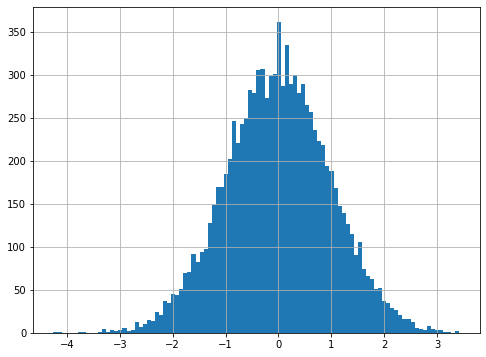

In [ ]:
normal_series.hist(figsize=(8,6), bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090a814250>,
      dtype=object)

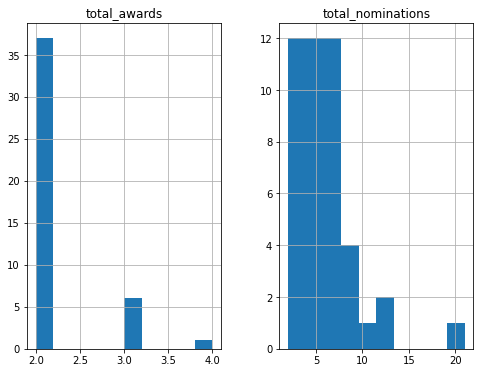

In [ ]:
wiki_df.hist(figsize=(8, 6))

In [ ]:
import os, pandas as pd

In [ ]:
os.listdir('sample_data')

['README.md',
 'anscombe.json',
 'california_housing_train.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv']

In [ ]:
housing_df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21568b3290>,
      dtype=object)

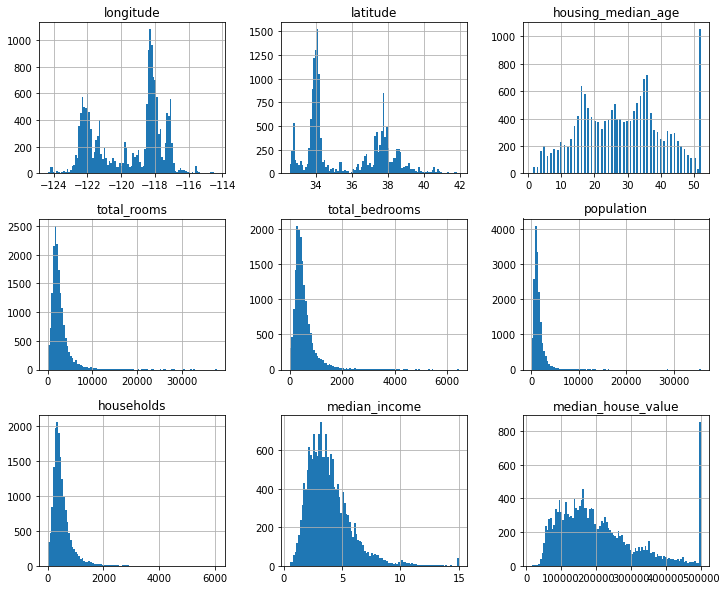

In [ ]:
housing_df.hist(figsize=(12,10), bins=100)

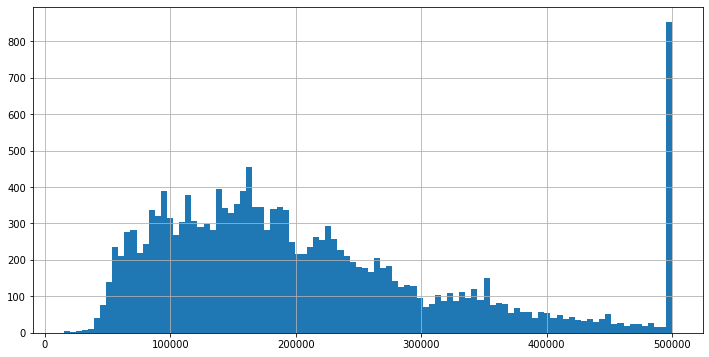

In [ ]:
housing_df['median_house_value'].hist(figsize=(12, 6), bins=100)

In [ ]:
equal_to_max_mask = housing_df['median_house_value'] == housing_df['median_house_value'].max()

In [ ]:
equal_to_max_mask

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Name: median_house_value, Length: 17000, dtype: bool

In [ ]:
housing_df[equal_to_max_mask]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
215,-116.43,33.75,24.0,2596.0,438.0,473.0,237.0,3.7727,500001.0
260,-116.55,33.84,28.0,2992.0,562.0,676.0,346.0,5.7613,500001.0
862,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,500001.0
1388,-117.17,32.69,40.0,2236.0,331.0,767.0,316.0,5.3177,500001.0
1404,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,500001.0
...,...,...,...,...,...,...,...,...,...
16419,-122.56,37.94,36.0,2023.0,242.0,653.0,241.0,10.6272,500001.0
16420,-122.56,37.92,37.0,1926.0,290.0,721.0,298.0,8.9248,500001.0
16421,-122.56,37.91,52.0,1972.0,327.0,755.0,345.0,7.1924,500001.0
16434,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,500001.0


In [ ]:
not_equal_to_max_mask = housing_df['median_house_value'] != housing_df['median_house_value'].max()

In [ ]:
clean_housing_df = housing_df[not_equal_to_max_mask]

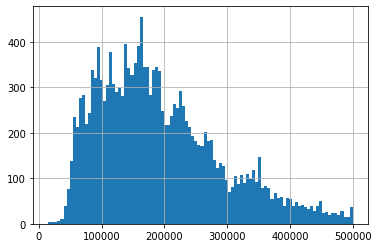

In [ ]:
clean_housing_df['median_house_value'].hist(bins=100)

## replace the problematic values with the mean

In [ ]:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## replace the problematic values with samples from a normal distribution

#Numpy Exercises

##1. Generate a vector with all multiples of 3 from 30 to 99

In [2]:
import numpy as np

a = np.arange(30,100,3)
a

array([30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78,
       81, 84, 87, 90, 93, 96, 99])

##2. Generate a square array of size (12, 12) filled with ones

In [5]:
a = np.ones((12,12), dtype=float)
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## 3. Generate an array of size (6,3) filled with all numbers between 1 and 18, backwards (18, 17, 16 ...)

In [7]:
a = np.arange(1,19)[::-1].reshape(6,3)
a

array([[18, 17, 16],
       [15, 14, 13],
       [12, 11, 10],
       [ 9,  8,  7],
       [ 6,  5,  4],
       [ 3,  2,  1]])

In [8]:
a = np.arange(18,0,-1).reshape(6,3)
a

array([[18, 17, 16],
       [15, 14, 13],
       [12, 11, 10],
       [ 9,  8,  7],
       [ 6,  5,  4],
       [ 3,  2,  1]])

## 4. Generate an array with the same shape as the previous exercise, but filled with zeros. BONUS: use only one method call

In [ ]:
a = np.zeros((6,3), dtype=float)
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## 5. Generate an array of shape (4, 6) filled with random numbers between -4 and 4

In [9]:
a = np.random.randint(-4,4,(4,6))
a

array([[-2,  0, -1, -3, -1, -1],
       [-3,  1,  0,  1,  1,  1],
       [ 2, -1, -1,  2, -4, -4],
       [-3,  3, -4,  0, -1, -2]])

## 6. Calculate the size of the array generated in the previous exercise

In [11]:
size_a = np.size(a)
size_a

24

## 7. Generate an array of shape (6, 3) filled with random numbers between 1 and 18, sorted in ascending order

In [12]:
b = np.random.randint(1,18,(6,3))
# b = np.sort(b, axis=1)
b

array([[ 3, 17,  8],
       [ 7,  4,  4],
       [14,  8,  4],
       [ 6,  3, 11],
       [17, 17,  3],
       [ 4,  1, 13]])

In [13]:
b[::-1].sort()
b

array([[ 3,  8, 17],
       [ 4,  4,  7],
       [ 4,  8, 14],
       [ 3,  6, 11],
       [ 3, 17, 17],
       [ 1,  4, 13]])

In [23]:
b = -np.sort(-np.random.randint(1,18,18)).reshape(6,3)
b

array([[17, 17, 17],
       [15, 15, 14],
       [14, 12,  9],
       [ 9,  8,  7],
       [ 5,  3,  2],
       [ 1,  1,  1]])

## 8. Sum the arrays from the 3rd and 7th exercise together


In [ ]:
c = a + b
c

array([[13, 12, 15],
       [ 9, 12, 20],
       [15, 22, 25],
       [17, 23, 30],
       [10, 13, 16],
       [14, 25, 28]])

## 9. Calculate the sum of all the values from each column in the last generated array

In [ ]:
sum_of_columns = c.sum(axis=0)
sum_of_columns

array([ 78, 107, 134])